# **Confidence Intervals and Bootstrapping**

### Bootstraping and confidence intervals are statistical techniques used to estimate population parameters from sample data. Let's break down both concepts:
1. Bootstraping:
- Bootstraping is a resampling method where multiple samples (called bootstrap samples) are drawn with replacement from the original sample data.
- Each bootstrap sample is the same size as the original sample, but it's created by randomly selecting data points from the original sample, allowing some data points to be selected multiple times while others may not be selected at all.
- This process creates multiple datasets that simulate the population distribution.
- Statistical inference can then be performed on these bootstrap samples to estimate parameters or calculate confidence intervals.

2. Confidence Interval:

- A confidence interval is a range of values that likely contains the true value of a population parameter.
- It's calculated from sample data and provides an interval estimate of the parameter's value along with a confidence level that quantifies the uncertainty associated with the estimate.
- The confidence level is often set at 95% (but it can vary), meaning that if the sampling were repeated many times, 95% of the intervals would contain the true parameter value.
- Confidence intervals are calculated based on the distribution of sample statistics, often assuming normality or using resampling methods like bootstrapping.


Now, let's demonstrate how bootstrapping is used to calculate a confidence interval:

Suppose we have a sample dataset of values, and we want to estimate the mean of the population from which this sample was drawn.

1. We start by randomly drawing a large number of bootstrap samples (with replacement) from the original sample dataset.
2. For each bootstrap sample, we calculate the sample mean.
3. We then collect these sample means from all the bootstrap samples to form a distribution of sample means.
4. From this distribution, we can calculate the desired confidence interval, typically by taking percentiles (e.g., 2.5th and 97.5th percentiles for a 95% confidence interval).
5. The resulting interval gives us a range of values within which we can be confident that the true population mean lies.


In summary, bootstrapping allows us to estimate the sampling distribution of a statistic (such as the mean) from a sample dataset, and confidence intervals provide a way to quantify the uncertainty associated with this estimate.


### Step 1: Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
df = pd.read_csv('pa_towns_pop.csv',on_bad_lines='skip')
print(df.head())

             Town  Residents
0      Aaronsburg        613
1   Ackermanville        610
2         Addison        202
3  Albrightsville        202
4      Alexandria        333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Town       640 non-null    object
 1   Residents  640 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
df['Residents'].describe()

count    640.000000
mean     549.137500
std      223.356876
min      201.000000
25%      357.000000
50%      522.500000
75%      724.250000
max      999.000000
Name: Residents, dtype: float64

Getting the confidence intervals from the sample:

### Standard Error of the Mean (SEM):

- SEM is a measure of how much the sample mean is likely to vary from the true population mean.
- It quantifies the precision of the sample mean estimate.
- SEM is calculated as the standard deviation of the sample divided by the square root of the sample size.

st.sem typically refers to the standard error of the mean (SEM).



In [ ]:
st.t.interval(confidence=0.95, df=len(df['Residents']-1),
              loc=np.mean(df['Residents']),
              scale=st.sem(df['Residents']))

(531.800277744372, 566.4747222556281)

Applying the bootstraping technique:

In [ ]:
df2 = df.sample(n=100,replace=True)

In [ ]:
np.mean(df2['Residents'])

524.0

In [ ]:
st.sem(df2['Residents'])

20.233820073023157

In [ ]:
bootstrap= pd.DataFrame({'mean_rating':[df2.sample(100, replace=True)
                         ['Residents'].mean() for i in range (0,1000)]})
bootstrap

,mean_rating
0,528.91
1,518.21
2,533.25
3,539.69
4,546.79
...,...
995,515.56
996,529.79
997,521.45
998,543.23


In [ ]:
bootstrap['mean_rating'].quantile(0.025)

485.3185

In [ ]:
bootstrap['mean_rating'].quantile(0.975)

561.9325

### Categoricals
pandas can include categorical data in a DataFrame.

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [ ]:
#Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [ ]:
#Grouping by a categorical column also shows empty categories:

df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


Every dataset you work with uses variables and observations. For example, you might be interested in understanding the following:

- How the height of basketball players is correlated to their shooting accuracy
- Whether there’s a relationship between employee work experience and salary
- What mathematical dependence exists between the population density and the gross domestic product of different countries

In the examples above, the height, shooting accuracy, years of experience, salary, population density, and gross domestic product are the features or variables. The data related to each player, employee, and each country are the observations.

When data is represented in the form of a table, the rows of that table are usually the observations, while the columns are the features.

# Correlation
Statistics and data science are often concerned about the relationships between two or more variables (or features) of a dataset. Each data point in the dataset is an observation, and the features are the properties or attributes of those observations.

### Correlations Coefficients
Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of high importance for science and technology, and Python has great tools that you can use to calculate them. SciPy, NumPy, and pandas correlation methods are fast, comprehensive, and well-documented.

### In this tutorial, you’ll learn:
- Pearson r
- linear regression

You’ll start with an explanation of correlation, then see three quick introductory examples, and finally dive into details of NumPy,Ccipy, Sklearn and pandas correlation.



If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features. Consider the following figures:

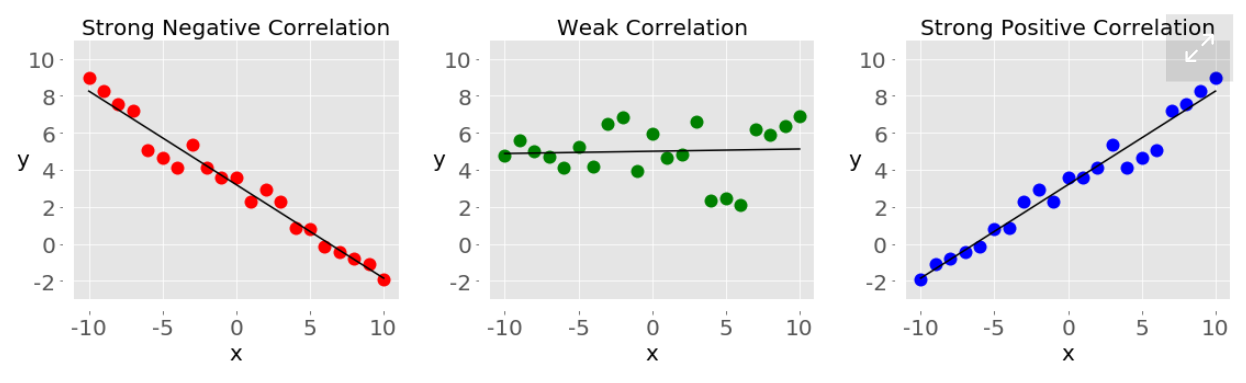

Each of these plots shows one of three different forms of correlation:

1. Negative correlation (red dots): In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

2. Weak or no correlation (green dots): The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

3. Positive correlation (blue dots): In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.



##Linear Correlation
Linear correlation measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher

### The Pearson (product-moment) correlation coefficient
is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:
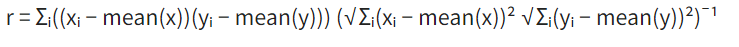

In [1]:
x = np.arange(10, 20)
y = np.array([2,1,4,5,8,12,18,96,48])

NameError: name 'np' is not defined

In [ ]:
r = np.corrcoef(x, y)
#r[0, 1]
#r[1, 0]

The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. They are always equal to 1.

However, what you usually need are the lower left and upper right values of the correlation matrix. These values are equal and both represent the Pearson correlation coefficient for x and y. In this case, it’s approximately 0.76.

In [ ]:
import scipy.stats
scipy.stats.pearsonr(x, y)    # Pearson's r

In [ ]:
x.corr(y)                     # Pearson's r

# Introduction to skLearn Linear regression
##Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem. Key concepts and features include:

Algorithmic decision-making methods, including:


*   Classification: identifying and categorizing data based on patterns.
*   Regression: predicting or projecting data values based on the average mean of existing and planned data.
*   Clustering: automatic grouping of similar data into datasets.

Algorithms that support predictive analysis ranging from simple linear regression to neural network pattern recognition.

Interoperability with NumPy, pandas, and matplotlib libraries.
ML is a technology that enables computers to learn from input data and to build/train a predictive model without explicit programming. ML is a subset of Artificial Intelligence (AI).



## Why Use SKLearn Liberary?
### scikit-learn is both well-documented and easy to learn/use. As a high-level library, it lets you define a predictive data model in just a few lines of code, and then use that model to fit your data. It’s versatile and integrates well with other Python libraries, such as matplotlib for plotting, numpy for array vectorization, and pandas for dataframes.

# Linear Regression
 Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

## Simple Linear regression Algorithm Example
It uses the slope-intercept form of a straight line, where:

- m and b are variables that the algorithm uses to learn or create the most
accurate predictive slope
- x represents input data
- y represents the prediction

### Step 2: Reading the dataset

Linear Regression [link text](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bottle.csv to bottle.csv


In [ ]:
data = pd.read_csv('bottle.csv', on_bad_lines='skip')
data.head(5)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_binary = data[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


### Step 3: Exploring the data scatter

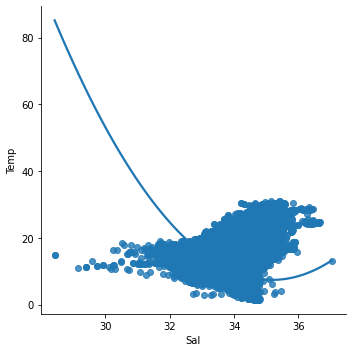

In [ ]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)


### Step 4: Data cleaning



In [ ]:
# Eliminating NaN or missing input numbers
#Fill NA/NaN values by propagating the last valid observation to next valid.

df_binary.fillna(method ='ffill', inplace = True)


/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


###   Step 5: Training our model



In [ ]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.20268633660302982


/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Step 6: Exploring our results



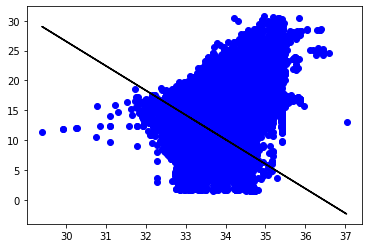

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values


The low accuracy score of our model suggests that our regressive model has not fit very well with the existing data. This suggests that our data is not suitable for linear regression. But sometimes, a dataset may accept a linear regressor if we consider only a part of it. Let us check for that possibility.   


### Step 7: Working with a smaller dataset

In [ ]:
# working with a smaller dataset
df_binary500 = df_binary[:][:500]

### lmplot
Plots the data and regression model fits across a FacetGrid.

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.



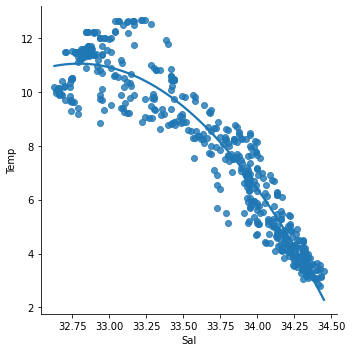

In [ ]:
# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,
                               order = 2, ci = None)

We can already see that the first 500 rows follow a linear model. Continuing with the same steps as before.



In [ ]:
df_binary500.fillna(method ='ffill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.8372166537355276


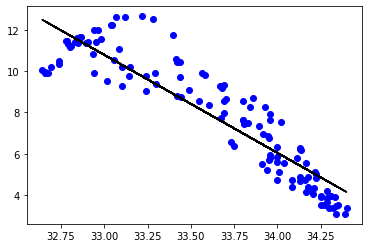

In [ ]:
# exploring results again
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

### Step 8: Evaluation Metrics For Regression

At last, we check the performance of the Linear Regression model with help of evaluation metrics. For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance.




1.   Mean Absolute Error (MAE):
MAE measures the average absolute difference between the predicted values and the true values.
It gives an idea of how wrong the predictions are on average.
MAE is not sensitive to outliers because it considers absolute differences.

2. Mean Squared Error (MSE):
MSE measures the average squared difference between the predicted values and the true values.
Squaring the differences penalizes larger errors more heavily, making MSE sensitive to outliers.
MSE is commonly used in optimization algorithms because of its differentiability properties.

3. Root Mean Squared Error (RMSE):
RMSE is the square root of the MSE.
It's essentially the square root of the average of squared differences between predicted and true values.
RMSE is in the same unit as the dependent variable, making it interpretable in the context of the problem.


Comparing these three metrics:

- MAE, being the simplest, gives a straightforward average of absolute errors.
- MSE and RMSE give more weight to larger errors due to squaring, making them sensitive to outliers.
- RMSE, being the square root of MSE, gives an interpretable measure in the same units as the dependent variable.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 0.9293046793849914
MSE: 1.3498751053737306
RMSE: 1.1618412565293637
